# Predicting success for NBA players

A range of different statistics are recorded for *rookie* (i.e. first year) basketball players over an NBA season.

In this notebook you will explore which features can be used to build a model to predict whether they will still be playing in the NBA 5 years later.

## Importing the libraries and data

In [1]:
# import pandas and seaborn
import pandas as pd
import seaborn as sns

# import pyplot from matplotlib for displaying decision trees
import matplotlib.pyplot as plt

# import modelling and metrics for decision trees from sklearn
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

In [2]:
#import the data
nba_data = pd.read_csv('nba_data.csv')

# display the data to check it has imported
nba_data

,Name,GP,MIN,PTS,FGS,FGA,3PM,3PA,FTM,FTA,OREB,DREB,AST,STL,BLK,TOV,5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,0.5,2.1,1.6,2.3,0.7,3.4,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,0.7,2.8,2.6,3.4,0.5,2.0,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,0.4,1.7,0.9,1.3,0.5,1.7,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,0.1,0.5,0.9,1.3,1.0,0.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,0.0,0.1,1.3,1.9,1.0,1.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,Chris Smith,80,15.8,4.3,1.6,3.6,0.0,0.2,1.2,1.5,0.4,0.8,2.5,0.6,0.2,0.8,0
1304,Brent Price,68,12.6,3.9,1.5,4.1,0.1,0.7,0.8,1.0,0.4,1.1,2.3,0.8,0.0,1.3,1
1305,Marlon Maxey,43,12.1,5.4,2.2,3.9,0.0,0.0,1.0,1.6,1.5,2.3,0.3,0.3,0.4,0.9,0
1306,Litterial Green,52,12.0,4.5,1.7,3.8,0.0,0.2,1.2,1.8,0.2,0.4,2.2,0.4,0.1,0.8,1


This data set contains information about NBA basketball players between 1990 and 2016. Each row describes the performance of a basketball player during their first ('rookie') year. Performance statistics are per game.

There are 1,308 individual records, each representing an individual player.

Features:
* **Name**: *Player name*
* **GP**: *Number of ames played*
* **MIN**: *Mean number of minutes played*
* **PTS**: *Mean number of points scored*
* **FGS**: *Mean number of field goals scored*
* **FGA**: *Mean number of field goals attempted*
* **3PM**: *Mean number of 3-point shots made*
* **3PA**: *Mean number of 3-point shots attempted*
* **FTM**: *Mean number of free throws made*
* **FTA**: *Mean number of free throws attempted*
* **OREB**: *Mean number of offensive rebounds*
* **DREB**: *Mean number of defensive rebounds*
* **AST**: *Mean number of assists*
* **STL**: *Mean number of steals*
* **BLK**: *Mean number of blocks*
* **TOV**: *Mean number of turnovers*
* **5Yrs**: *Whether the player was still playing in the NBA after 5 years (0 = not playing after 5 years, 1 = playing after 5 years)*

# Pre-processing the data

In [3]:
# display the data types
nba_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    1308 non-null   object 
 1   GP      1308 non-null   int64  
 2   MIN     1308 non-null   float64
 3   PTS     1308 non-null   float64
 4   FGS     1308 non-null   float64
 5   FGA     1308 non-null   float64
 6   3PM     1308 non-null   float64
 7   3PA     1308 non-null   float64
 8   FTM     1308 non-null   float64
 9   FTA     1308 non-null   float64
 10  OREB    1308 non-null   float64
 11  DREB    1308 non-null   float64
 12  AST     1308 non-null   float64
 13  STL     1308 non-null   float64
 14  BLK     1308 non-null   float64
 15  TOV     1308 non-null   float64
 16  5Yrs    1308 non-null   int64  
dtypes: float64(14), int64(2), object(1)
memory usage: 173.8+ KB


## Feature engineering: Adding text for a categorical feature

In [4]:
# the 5Yrs feature is used to create a new field: Successful
nba_data['Successful'] = nba_data['5Yrs'].replace({0: 'No', 1: 'Yes'})

# diplay the data to check
nba_data

,Name,GP,MIN,PTS,FGS,FGA,3PM,3PA,FTM,FTA,OREB,DREB,AST,STL,BLK,TOV,5Yrs,Successful
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,0.5,2.1,1.6,2.3,0.7,3.4,1.9,0.4,0.4,1.3,0,No
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,0.7,2.8,2.6,3.4,0.5,2.0,3.7,1.1,0.5,1.6,0,No
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,0.4,1.7,0.9,1.3,0.5,1.7,1.0,0.5,0.3,1.0,0,No
3,Malik Sealy,58,11.6,5.7,2.3,5.5,0.1,0.5,0.9,1.3,1.0,0.9,0.8,0.6,0.1,1.0,1,Yes
4,Matt Geiger,48,11.5,4.5,1.6,3.0,0.0,0.1,1.3,1.9,1.0,1.5,0.3,0.3,0.4,0.8,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,Chris Smith,80,15.8,4.3,1.6,3.6,0.0,0.2,1.2,1.5,0.4,0.8,2.5,0.6,0.2,0.8,0,No
1304,Brent Price,68,12.6,3.9,1.5,4.1,0.1,0.7,0.8,1.0,0.4,1.1,2.3,0.8,0.0,1.3,1,Yes
1305,Marlon Maxey,43,12.1,5.4,2.2,3.9,0.0,0.0,1.0,1.6,1.5,2.3,0.3,0.3,0.4,0.9,0,No
1306,Litterial Green,52,12.0,4.5,1.7,3.8,0.0,0.2,1.2,1.8,0.2,0.4,2.2,0.4,0.1,0.8,1,Yes


# Exploratory data analysis
It is useful to get the totals for the `Successful` feature.

In [5]:
nba_data['Successful'].value_counts()

Yes    816
No     492
Name: Successful, dtype: int64

The means for the different features can be explored, categorised by `Successful`.

In [6]:
# create a list of the features to be explored
features=['GP', 'MIN', 'PTS', 'FGS', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TOV']

# use group by to get the means of these for 'no' and 'yes'
nba_data.groupby('Successful')[features].mean().round(2)

,GP,MIN,PTS,FGS,FGA,3PM,3PA,FTM,FTA,OREB,DREB,AST,STL,BLK,TOV
Successful,,,,,,,,,,,,,,,
No,51.25,14.16,5.00,1.93,4.51,0.23,0.76,0.91,1.30,0.71,1.52,1.21,0.49,0.25,0.93
Yes,65.83,19.69,7.86,3.04,6.69,0.26,0.79,1.52,2.12,1.19,2.33,1.74,0.69,0.44,1.34


The `PTS` feature appears to the show one of the biggest differences in the means. You can explore this further using additional statistics and charts.

In [7]:
# group the data by Succesful get the statistics
nba_data.groupby('Successful')['PTS'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Successful,,,,,,,,
No,492.0,5.00,3.07,0.7,3.0,4.1,6.1,21.9
Yes,816.0,7.86,4.62,1.0,4.5,6.8,10.1,28.2


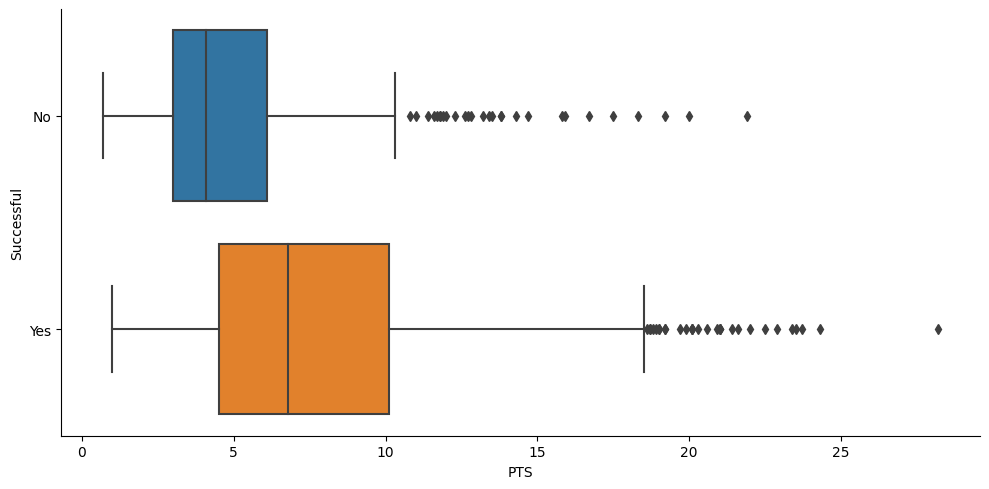

In [8]:
# display a boxplot for the PTS column grouped by Successful
sns.catplot(kind='box', x='PTS', y='Successful', data=nba_data, aspect=2);

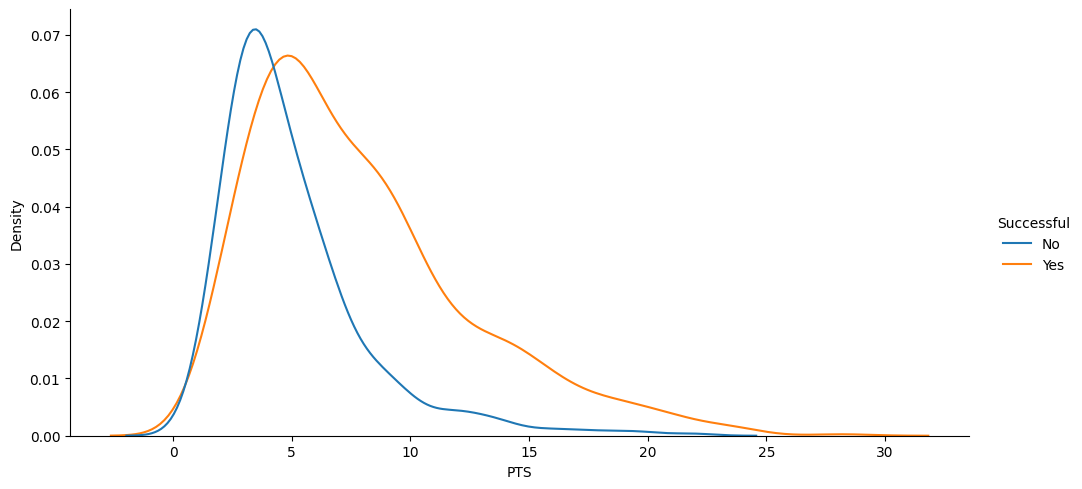

In [9]:
# display a kde for PTS split by Successful
sns.displot(kind='kde', x='PTS', hue='Successful', data=nba_data, aspect=2);

# Building a model (1): single input feature

## Identifying target feature, possible input features and performing the training/testing split
Defining the target feature/possible input features and performing the training/testing split is the same process for a binary classification model as it is for a linear regression model.

In [10]:
# define target
y = nba_data['5Yrs']

# create a list of all the input features and define the X
all_features = ['GP', 'MIN', 'PTS', 'FGS', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'OREB', 'DREB', 'AST', 'STL', 'BLK', 'TOV']
X_all = nba_data[all_features]

# perform the training-testing split
X_train, X_test, y_train, y_test = train_test_split(X_all, y, train_size=0.8, random_state=1)

# display the length of the lists to check 
print("Size of X_train: ",X_train.shape)
print("Length of y_train: ",len(y_train))
print("Size of X_test: ",X_test.shape)
print("Length of y_test: ",len(y_test))

Size of X_train:  (1046, 15)
Length of y_train:  1046
Size of X_test:  (262, 15)
Length of y_test:  262


## Building a model based on `PTS`

The code in the box below:

* Defines the input_features.
* Creates the model: it finds the best value of the target features to split at using the `DecisionTreeClassifier().fit` command from the sklearn machine learning library with the number of splits determined by the value of `max_depth`.
* Displays the model as a decision tree using `plot_tree` from the matplotlib library.
* Creates a list of the predictions using the model.
* Displays the precision and recall.


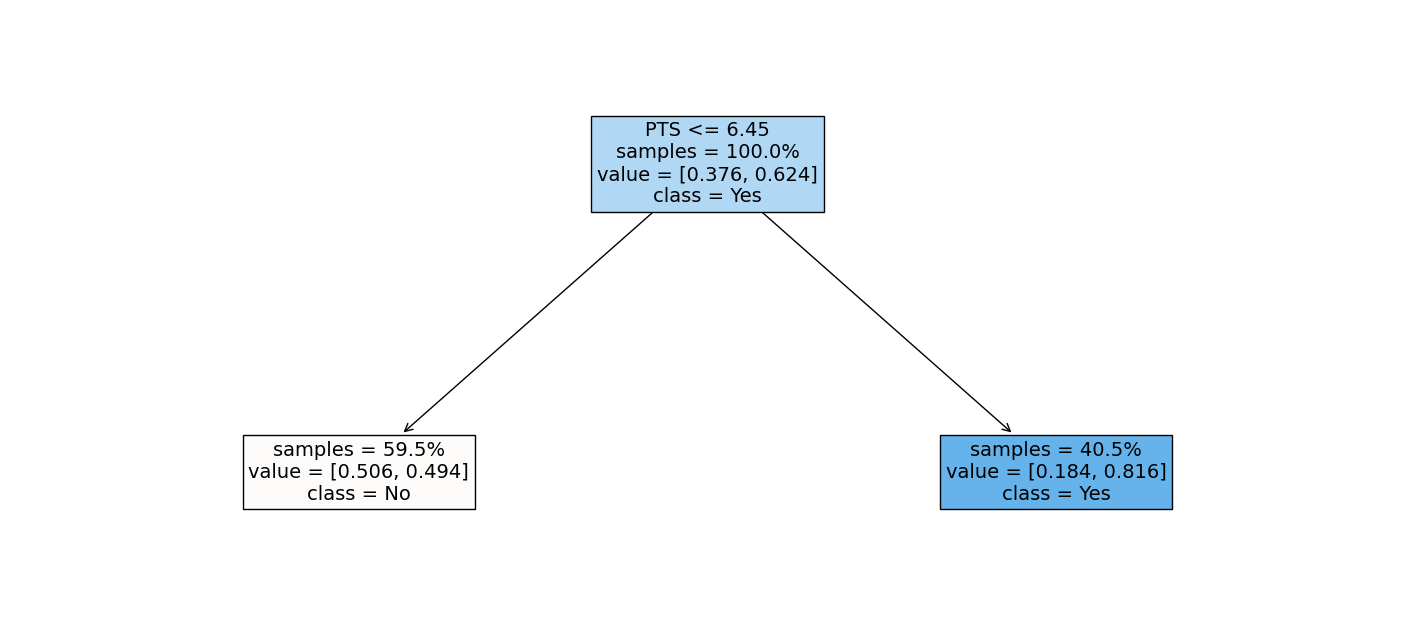

Precision:  79.0909090909091
Recall:  53.37423312883436


In [11]:
# define the input features
input_features = ['PTS']

# create the model
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train[input_features], y_train)

# display the model
fig, ax = plt.subplots(figsize=(18,8))
plot_tree(tree_model,  filled=True, impurity=False, feature_names=input_features, proportion=True, class_names=["No", "Yes"], ax=ax, fontsize=14)
plt.show()

# create a list of the predictions
y_pred = tree_model.predict(X_test[input_features])

# display the precision and recall
print("Precision: ",100*precision_score(y_test, y_pred))
print("Recall: ",100*recall_score(y_test, y_pred))

# Exploration

## Building a model based on `GP`

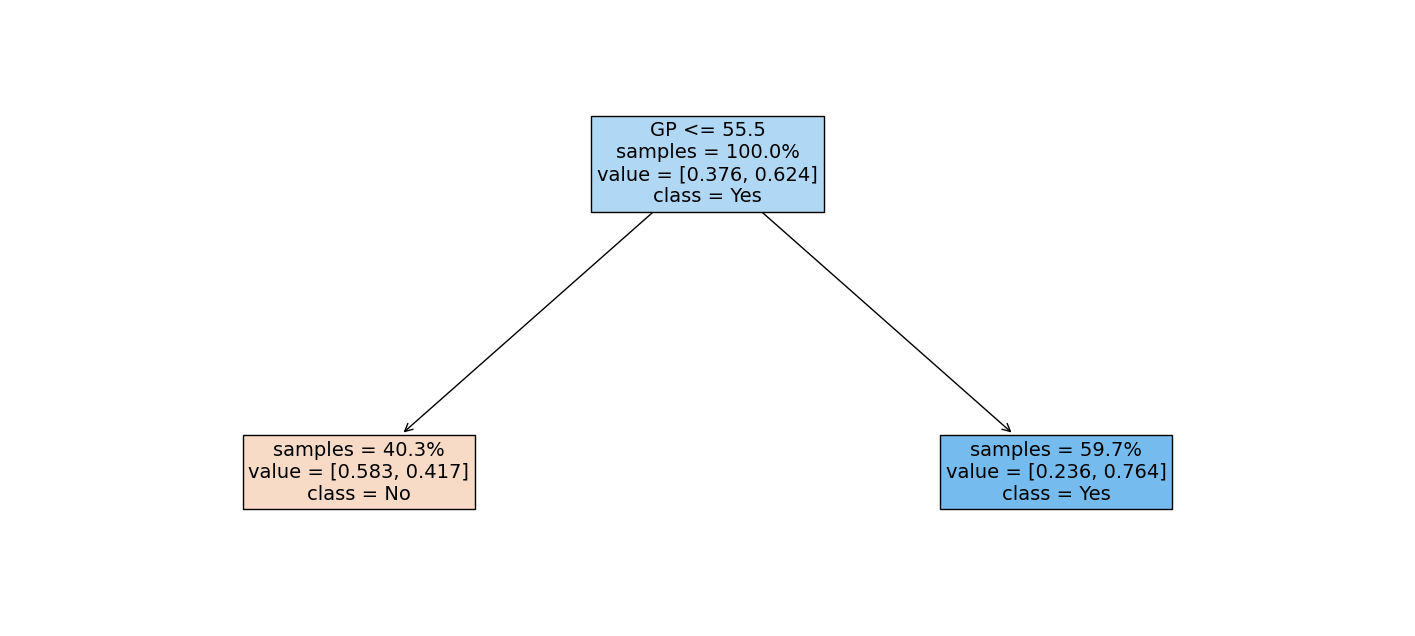

Precision:  76.21951219512195
Recall:  76.68711656441718


In [12]:
# copy the code for building a model with PTS and change this to GP
# define the input features
input_features = ['GP']

# create the model
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train[input_features], y_train)

# display the model
fig, ax = plt.subplots(figsize=(18,8))
plot_tree(tree_model,  filled=True, impurity=False, feature_names=input_features, proportion=True, class_names=["No", "Yes"], ax=ax, fontsize=14)
plt.show()

# create a list of the predictions
y_pred = tree_model.predict(X_test[input_features])

# display the precision and recall
print("Precision: ",100*precision_score(y_test, y_pred))
print("Recall: ",100*recall_score(y_test, y_pred))

*You should get Precision: 76.2% and Recall: 76.7%. Your model should suggest splitting on GP <= 55.5.*

## Building a model based on another feature

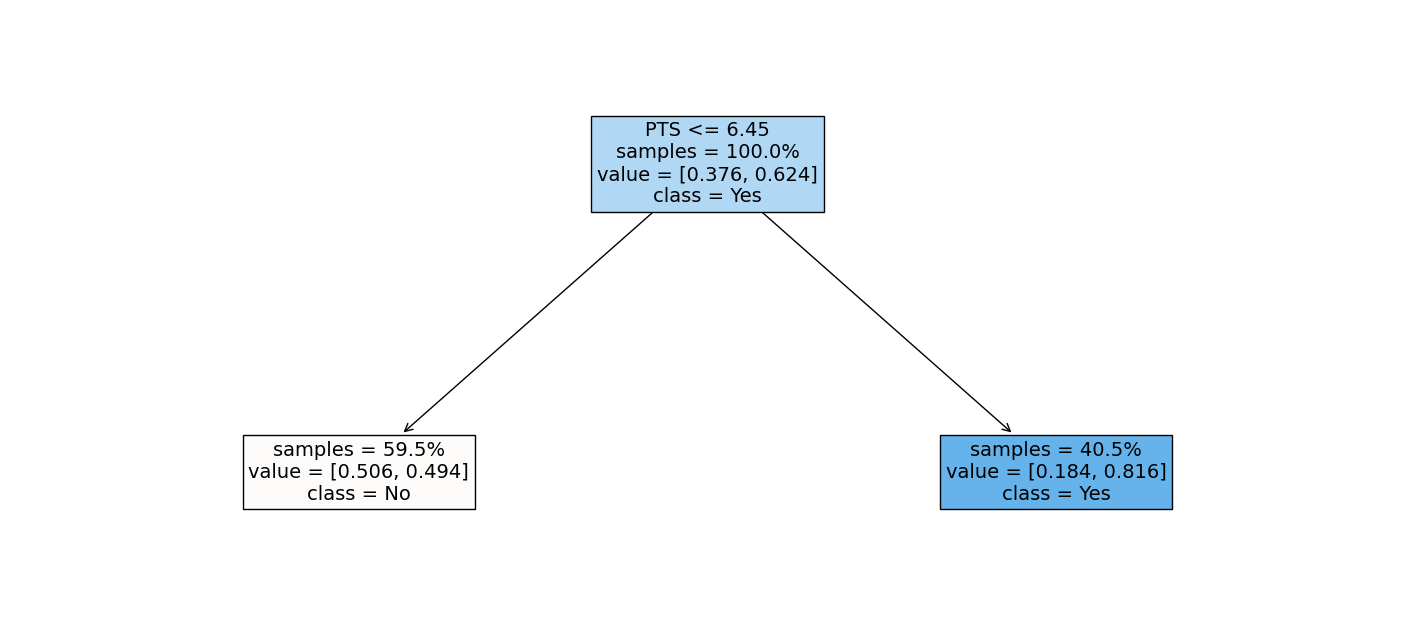

Precision:  79.0909090909091
Recall:  53.37423312883436


In [13]:
# define the input features
input_features = ['PTS']

# create the model
tree_model = DecisionTreeClassifier(max_depth=1).fit(X_train[input_features], y_train)

# display the model
fig, ax = plt.subplots(figsize=(18,8))
plot_tree(tree_model,  filled=True, impurity=False, feature_names=input_features, proportion=True, class_names=["No", "Yes"], ax=ax, fontsize=14)
plt.show()

# create a list of the predictions
y_pred = tree_model.predict(X_test[input_features])

# display the precision and recall
print("Precision: ",100*precision_score(y_test, y_pred))
print("Recall: ",100*recall_score(y_test, y_pred))

## Building a model based on another feature

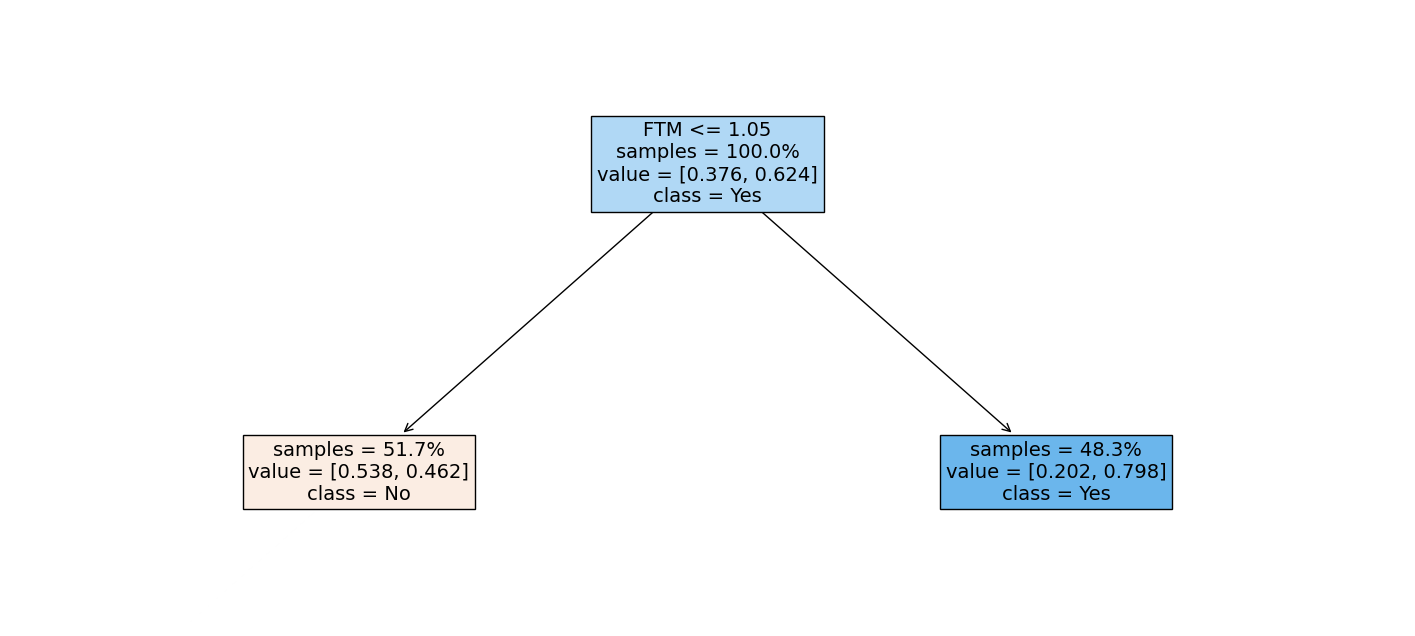

In [14]:
# Define the input features
input_features = ['FTM']

# create the model
tree_model = DecisionTreeClassifier(max_depth=1)
tree_model.fit(X_train[input_features], y_train)

# display the model
fig, ax = plt.subplots(figsize=(18,8)) # creates a figure with axes 
plot_tree(tree_model,  # name of the model to be plotted 
          filled=True,  # Stronger color represents lower node impurity (measured by gini coefficient)
          impurity=False, # Don't show the gini coefficient at the node
          feature_names=input_features, # Use feature names instead of numbers
          proportion=True, # Show the proportions of each class that reach the node
          class_names=["No", "Yes"], # Human readable labels, in ascending order of class numerical value
          ax=ax, # plot the tree on the axes defined
          fontsize=14 # set the font size for display (14 for depth 1 or 2; 12 for depth 3)
         ); 
plt.show() # plots the decision tree immediately so that precision and recall appear below it

# Building a model (2): multiple input features

## Building a model based on `GP` and `PTS`

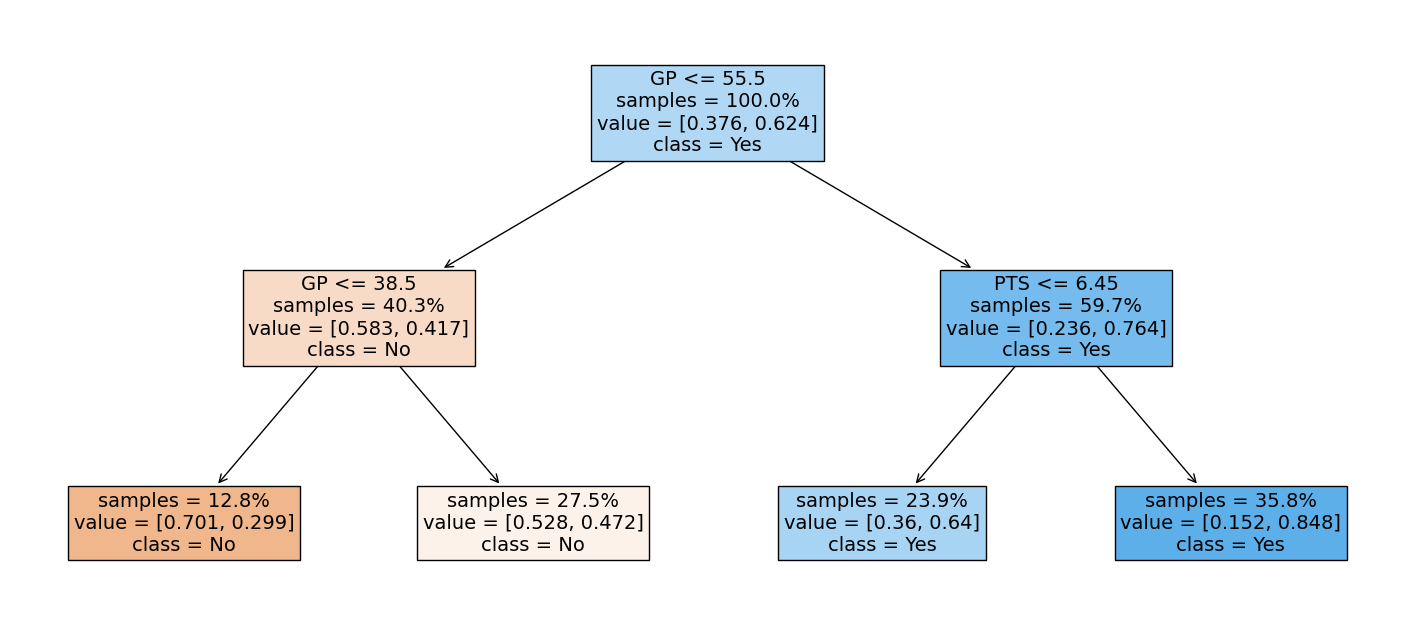

Precision:  76.21951219512195
Recall:  76.68711656441718


In [15]:
# define the input features
input_features = ['GP', 'PTS']

# create the model
tree_model = DecisionTreeClassifier(max_depth=2).fit(X_train[input_features], y_train)

# display the model
fig, ax = plt.subplots(figsize=(18,8))
plot_tree(tree_model,  filled=True, impurity=False, feature_names=input_features, proportion=True, class_names=["No", "Yes"], ax=ax, fontsize=14)
plt.show()

# create a list of the predictions
y_pred = tree_model.predict(X_test[input_features])

# display the precision and recall
print("Precision: ",100*precision_score(y_test, y_pred))
print("Recall: ",100*recall_score(y_test, y_pred))

## Building a model based on another pair of features

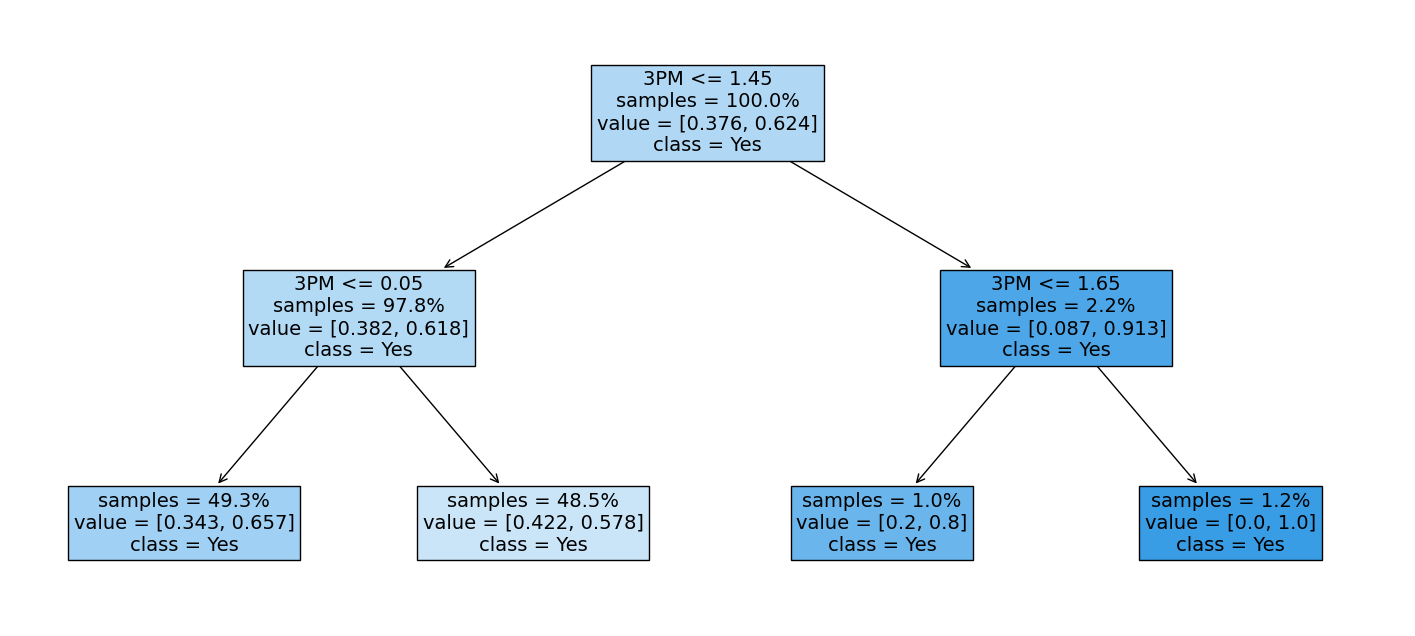

Precision:  62.213740458015266
Recall:  100.0


In [16]:
# define the input features
input_features = ['3PA', '3PM']

# create the model
tree_model = DecisionTreeClassifier(max_depth=2).fit(X_train[input_features], y_train)

# display the model
fig, ax = plt.subplots(figsize=(18,8))
plot_tree(tree_model,  filled=True, impurity=False, feature_names=input_features, proportion=True, class_names=["No", "Yes"], ax=ax, fontsize=14)
plt.show()

# create a list of the predictions
y_pred = tree_model.predict(X_test[input_features])

# display the precision and recall
print("Precision: ",100*precision_score(y_test, y_pred))
print("Recall: ",100*recall_score(y_test, y_pred))

## Building a model based on another pair of features

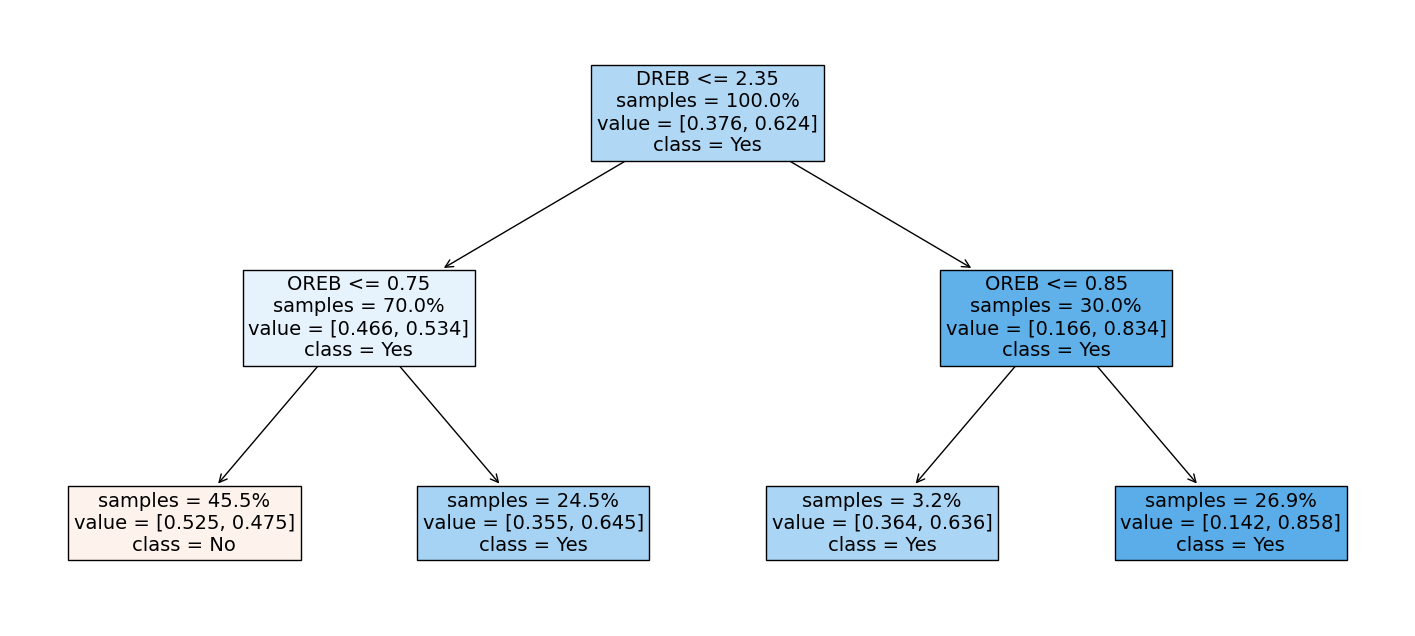

Precision:  75.17241379310344
Recall:  66.87116564417178


In [17]:
# define the input features
input_features = ['DREB', 'OREB']

# create the model
tree_model = DecisionTreeClassifier(max_depth=2).fit(X_train[input_features], y_train)

# display the model
fig, ax = plt.subplots(figsize=(18,8))
plot_tree(tree_model,  filled=True, impurity=False, feature_names=input_features, proportion=True, class_names=["No", "Yes"], ax=ax, fontsize=14)
plt.show()

# create a list of the predictions
y_pred = tree_model.predict(X_test[input_features])

# display the precision and recall
print("Precision: ",100*precision_score(y_test, y_pred))
print("Recall: ",100*recall_score(y_test, y_pred))

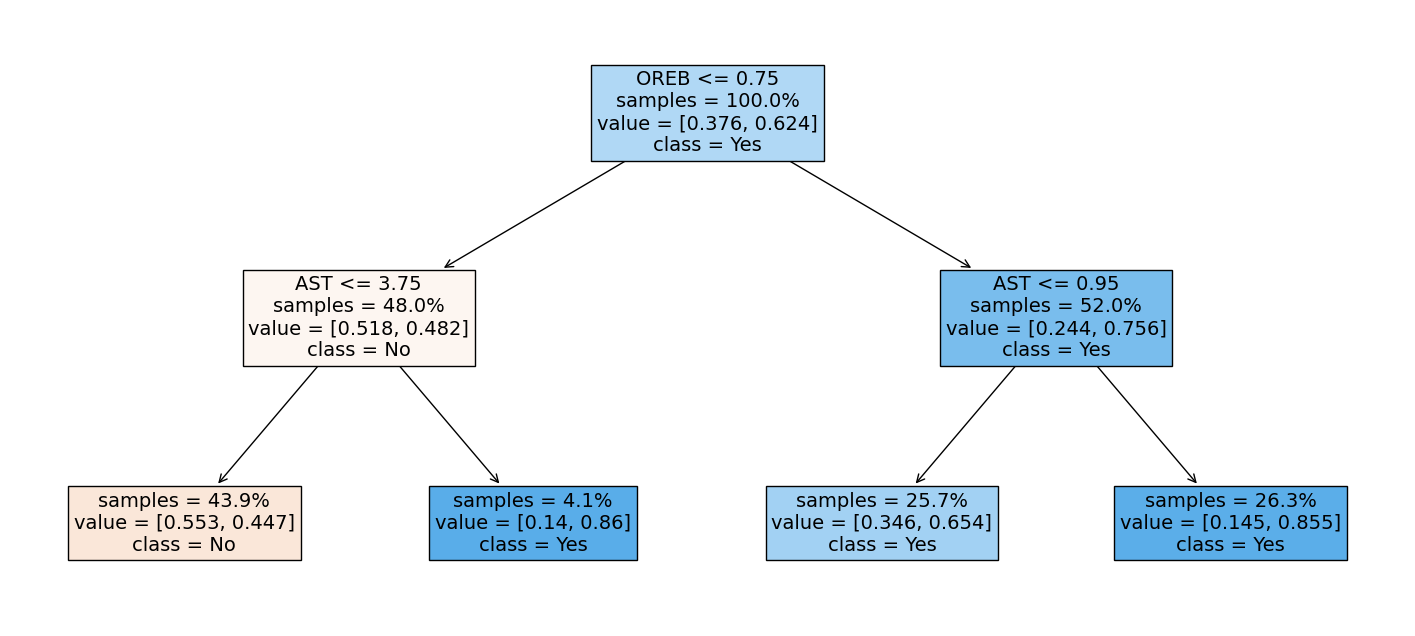

Precision:  75.52447552447552
Recall:  66.25766871165644


In [18]:
# define the input features
input_features = ['AST', 'OREB']

# create the model
tree_model = DecisionTreeClassifier(max_depth=2).fit(X_train[input_features], y_train)

# display the model
fig, ax = plt.subplots(figsize=(18,8))
plot_tree(tree_model,  filled=True, impurity=False, feature_names=input_features, proportion=True, class_names=["No", "Yes"], ax=ax, fontsize=14)
plt.show()

# create a list of the predictions
y_pred = tree_model.predict(X_test[input_features])

# display the precision and recall
print("Precision: ",100*precision_score(y_test, y_pred))
print("Recall: ",100*recall_score(y_test, y_pred))

# Building a model (3)

## Feature engineering: adding additional features

You could try further improving your model by adding additional features derived from the existing ones. For example you could find the percentage of 3-point shots made using:

`nba_data['3P%']=nba_data['3PM']/nba_data['3PA']*100`

You could also create features for the percentage of field goals made and the percentage of free throws made. Once you have created these features you can use these as inputs to a binary classification model; however, you will need to perform a new training-testing split.

In [19]:
# create a feature 3P%
nba_data['3P%'] = nba_data['3PM'] / nba_data['3PA'] * 100

# check the data
nba_data

,Name,GP,MIN,PTS,FGS,FGA,3PM,3PA,FTM,FTA,OREB,DREB,AST,STL,BLK,TOV,5Yrs,Successful,3P%
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,0.5,2.1,1.6,2.3,0.7,3.4,1.9,0.4,0.4,1.3,0,No,23.809524
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,0.7,2.8,2.6,3.4,0.5,2.0,3.7,1.1,0.5,1.6,0,No,25.000000
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,0.4,1.7,0.9,1.3,0.5,1.7,1.0,0.5,0.3,1.0,0,No,23.529412
3,Malik Sealy,58,11.6,5.7,2.3,5.5,0.1,0.5,0.9,1.3,1.0,0.9,0.8,0.6,0.1,1.0,1,Yes,20.000000
4,Matt Geiger,48,11.5,4.5,1.6,3.0,0.0,0.1,1.3,1.9,1.0,1.5,0.3,0.3,0.4,0.8,1,Yes,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,Chris Smith,80,15.8,4.3,1.6,3.6,0.0,0.2,1.2,1.5,0.4,0.8,2.5,0.6,0.2,0.8,0,No,0.000000
1304,Brent Price,68,12.6,3.9,1.5,4.1,0.1,0.7,0.8,1.0,0.4,1.1,2.3,0.8,0.0,1.3,1,Yes,14.285714
1305,Marlon Maxey,43,12.1,5.4,2.2,3.9,0.0,0.0,1.0,1.6,1.5,2.3,0.3,0.3,0.4,0.9,0,No,NaN
1306,Litterial Green,52,12.0,4.5,1.7,3.8,0.0,0.2,1.2,1.8,0.2,0.4,2.2,0.4,0.1,0.8,1,Yes,0.000000


Looking at the `3P%` values you can see that at least one of them is `NaN`. This is as a result of dividing by 0 when the value of `3PA` is 0. The `DecisionTreeClassifier` command will result in an error if these are used a input.

In this situation you could replace these values with 0. Run the code below using the `fillna(0)` command to do this.

In [20]:
nba_data['3P%'] = nba_data['3P%'].fillna(0)

nba_data

,Name,GP,MIN,PTS,FGS,FGA,3PM,3PA,FTM,FTA,OREB,DREB,AST,STL,BLK,TOV,5Yrs,Successful,3P%
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,0.5,2.1,1.6,2.3,0.7,3.4,1.9,0.4,0.4,1.3,0,No,23.809524
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,0.7,2.8,2.6,3.4,0.5,2.0,3.7,1.1,0.5,1.6,0,No,25.000000
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,0.4,1.7,0.9,1.3,0.5,1.7,1.0,0.5,0.3,1.0,0,No,23.529412
3,Malik Sealy,58,11.6,5.7,2.3,5.5,0.1,0.5,0.9,1.3,1.0,0.9,0.8,0.6,0.1,1.0,1,Yes,20.000000
4,Matt Geiger,48,11.5,4.5,1.6,3.0,0.0,0.1,1.3,1.9,1.0,1.5,0.3,0.3,0.4,0.8,1,Yes,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,Chris Smith,80,15.8,4.3,1.6,3.6,0.0,0.2,1.2,1.5,0.4,0.8,2.5,0.6,0.2,0.8,0,No,0.000000
1304,Brent Price,68,12.6,3.9,1.5,4.1,0.1,0.7,0.8,1.0,0.4,1.1,2.3,0.8,0.0,1.3,1,Yes,14.285714
1305,Marlon Maxey,43,12.1,5.4,2.2,3.9,0.0,0.0,1.0,1.6,1.5,2.3,0.3,0.3,0.4,0.9,0,No,0.000000
1306,Litterial Green,52,12.0,4.5,1.7,3.8,0.0,0.2,1.2,1.8,0.2,0.4,2.2,0.4,0.1,0.8,1,Yes,0.000000


In [21]:
# create features for FG% and FT%

In [22]:
# perform a new training-testing split

In [23]:
# create and measure some binary classification models that include the new features

# Appendix 1: Overfitting with Decision Trees
It might be tempting to keep increasing the depth of your decision tree.

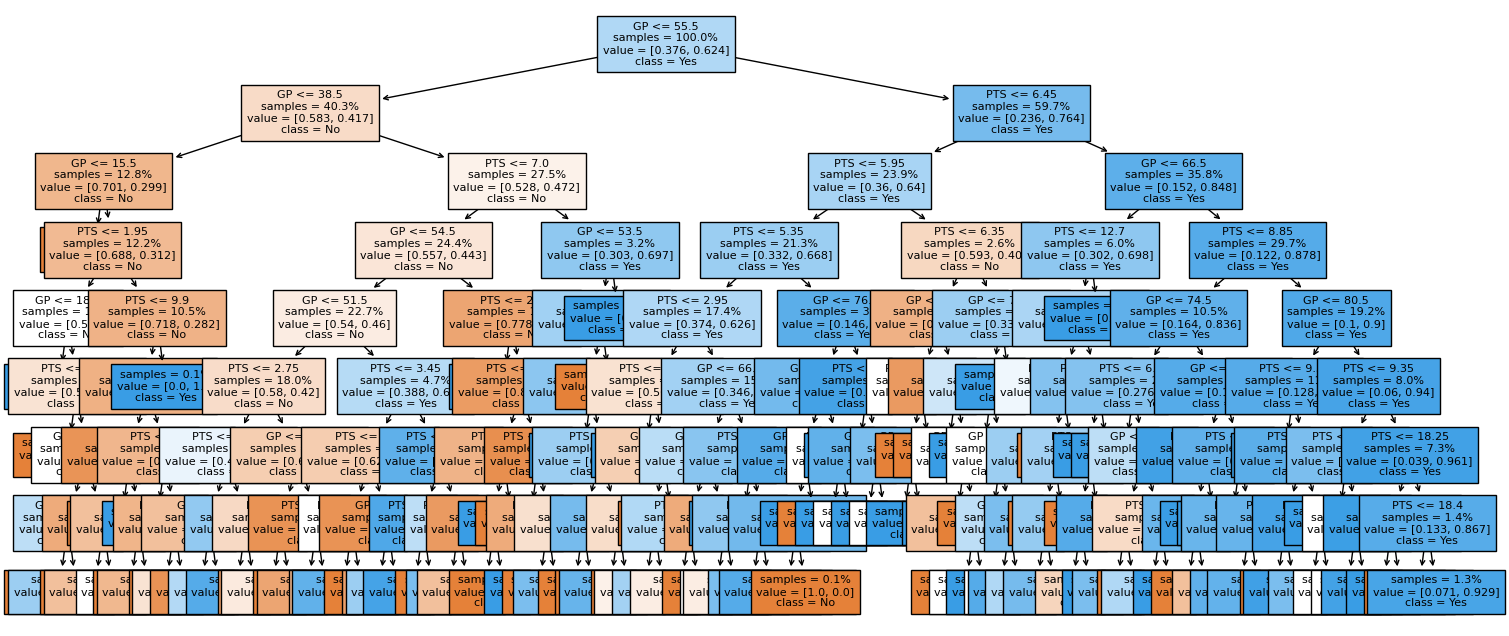

Precision:  72.15189873417721
Recall:  69.93865030674846


In [24]:
# This will take a bit longer than usual!

# define the input features
input_features = [ 'GP', 'PTS']

# create the model
tree_model = DecisionTreeClassifier(max_depth=8)
tree_model.fit(X_train[input_features], y_train)

# display the model
fig, ax = plt.subplots(figsize=(18,8))
plot_tree(tree_model,  filled=True, impurity=False, feature_names=input_features, proportion=True, class_names=["No", "Yes"], ax=ax, fontsize=8)
plt.show()

# create a list of the predictions
y_pred = tree_model.predict(X_test[input_features])

# display the precision and recall
print("Precision: ",100*precision_score(y_test, y_pred))
print("Recall: ",100*recall_score(y_test, y_pred))

The metrics are worse. This is because the tree has so many leaves that each leaf only contains a small number of players. It has mistaken noise for signal.

This is why you _prune_ decision trees to a lower `max_depth`.

# Appendix 2: Explaining the parameters for the plot_tree command

The code below shows explains the parameters used in the `plot_tree` command.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6f513454-2133-417c-9e7f-7bcd9367c060' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>